# Лабораторная работа №3
##  Решение нелинейных уравнений численными методами.
---  
### Цель: Оценка точности численных методов (метод простой итерации, метод Ньютона), подсчёт количества необходимых итераций
---
#### Для исследования выберем пункт 12.4(a), 12.5(а), 12.7(г): 

12.4(a):$~~~ 2x^2 + 5x - 3 = 0$

---
12.5(a):
$$
\begin{cases}
sin(x + 1) - y = 1.2 \\
2x + cos(y) = 2
\end{cases}
$$
С точностью $\varepsilon = 10^{-3} $ определить координаты точки пересечения кривых

---
12.7(г):
$$
\begin{cases}
sin(x) - y = 1.32 \\
cos(y) - x = - 0.85
\end{cases}
$$
С точностью $\varepsilon = 10^{-5} $ определить координаты всех точек пересечения кривых

---

#### Испорт модулей:

In [129]:
import numpy as np
import sys
import random
from abc import ABC, ABCMeta, abstractmethod, abstractproperty
from matplotlib import pyplot as plt
from sympy import *

#### Объявление классов: 

In [130]:
class ICallable (ABC):

    @abstractmethod
    def __call__(self):
        pass

####            Function is a 'callable' object
class IFunction (ICallable, ABC):
    func = 0
    name = ""
    def __init__(self, func, name = ""):
        self.func = func
        self.name = name

####            Different types of functions
class OneArgFunction(IFunction):

    def __call__(self, arg_1):
        return self.func(arg_1)

####            Graph creator
class GraphCreator(ICallable):

    graph = 0
    def __init__(self, x_size, y_size, name = ""):
        self.graph = plt.figure(figsize=[x_size, y_size])
        plt.title(name)

    def set_xyscale (self, x, y):
        ax = self.graph.add_subplot(111)
        ax.set_xscale(x)
        ax.set_yscale(y)

    def add_graph(self, x_arr, y_arr, x_name = "x", y_name = "y", color = "red", legend_name = ''):
        plt.plot (x_arr, y_arr, color, label = legend_name)

        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.grid()
    
    def __call__(self):
        plt.show()


#### Основная часть

Find the roots of the following equation:
2 * x * x + 5 * x - 3 = 0
Symbolic calculating of roots give the following result:
[-3, 1/2]


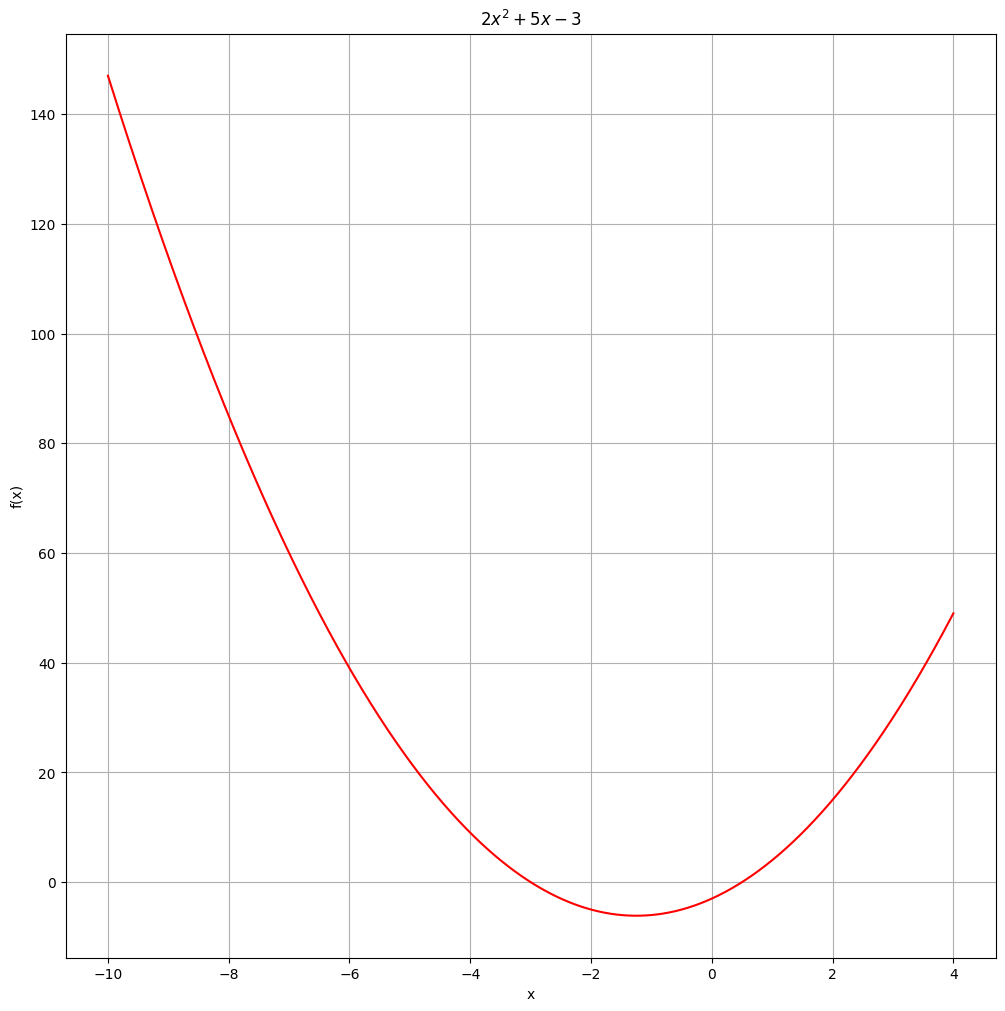

Choosing an area of ​localization for the first root (x = -3)
According to the plot, choose an area [-3.5, -2.5]
-------------------------
Choose the following phi-function for iterations: 


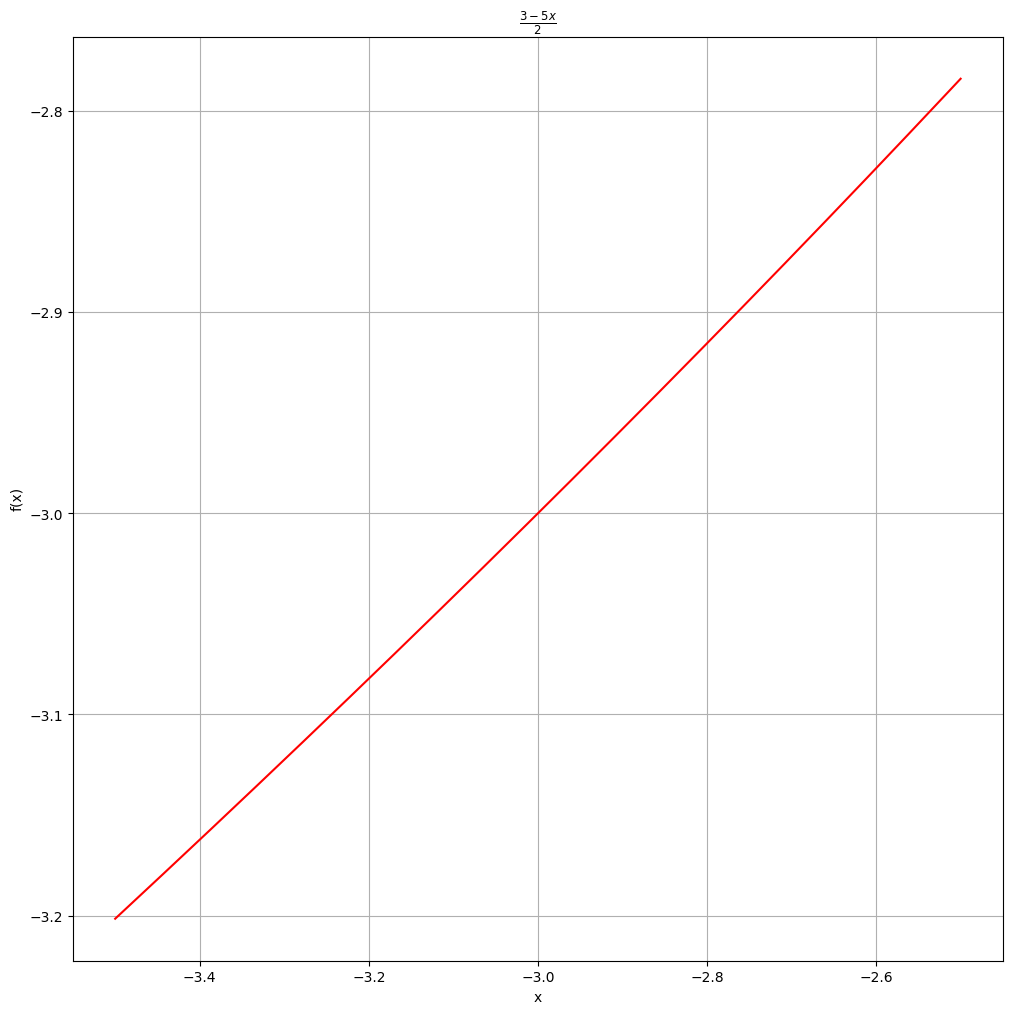

We can see that values of phi-function lie in the localization area
-------------------------
Calculating the derivate of phi-function...


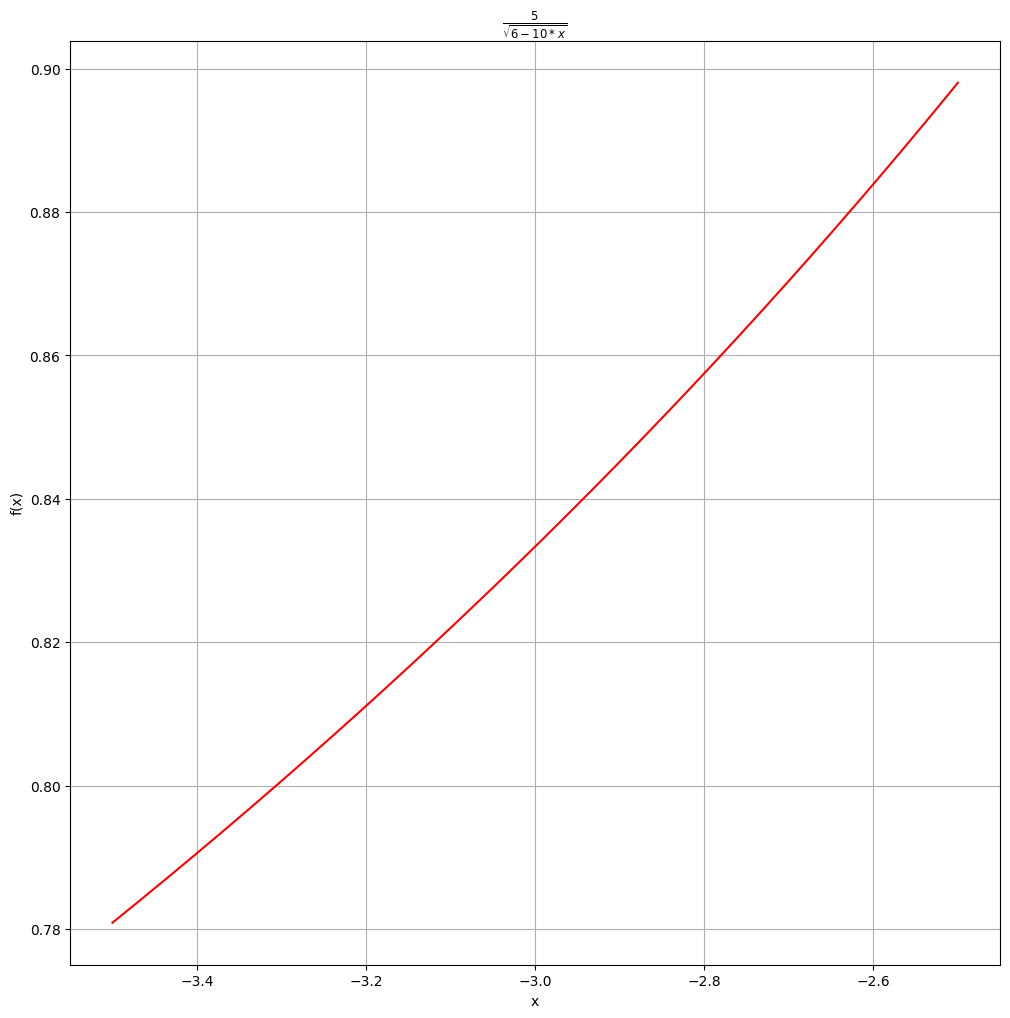

We can see that values of the phi derivate lie in the range (0, 1)
-------------------------
Choose x_0 from the area of ​localization
x_0 = -2.653377208881704
-------------------------
Searching the root...
Calculated root: -3.0
0.0
Number of iterations: 40
-------------------------
Choosing an area of ​localization for the second root (x = 1/2)
According to the plot, choose an area [0.1, 1]
-------------------------
Choose the following phi-function for iterations: 


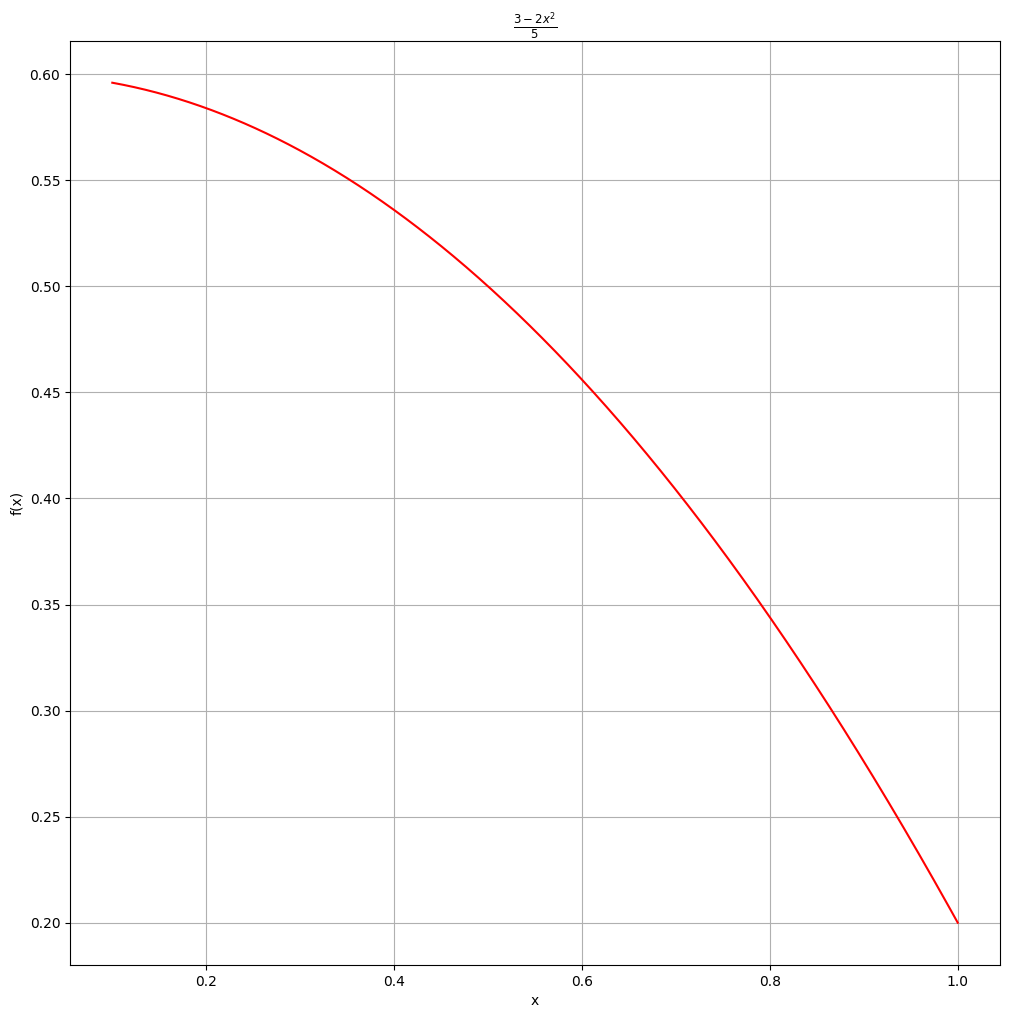

We can see that values of phi-function lie in the localization area
-------------------------
Calculating the derivate of phi-function...


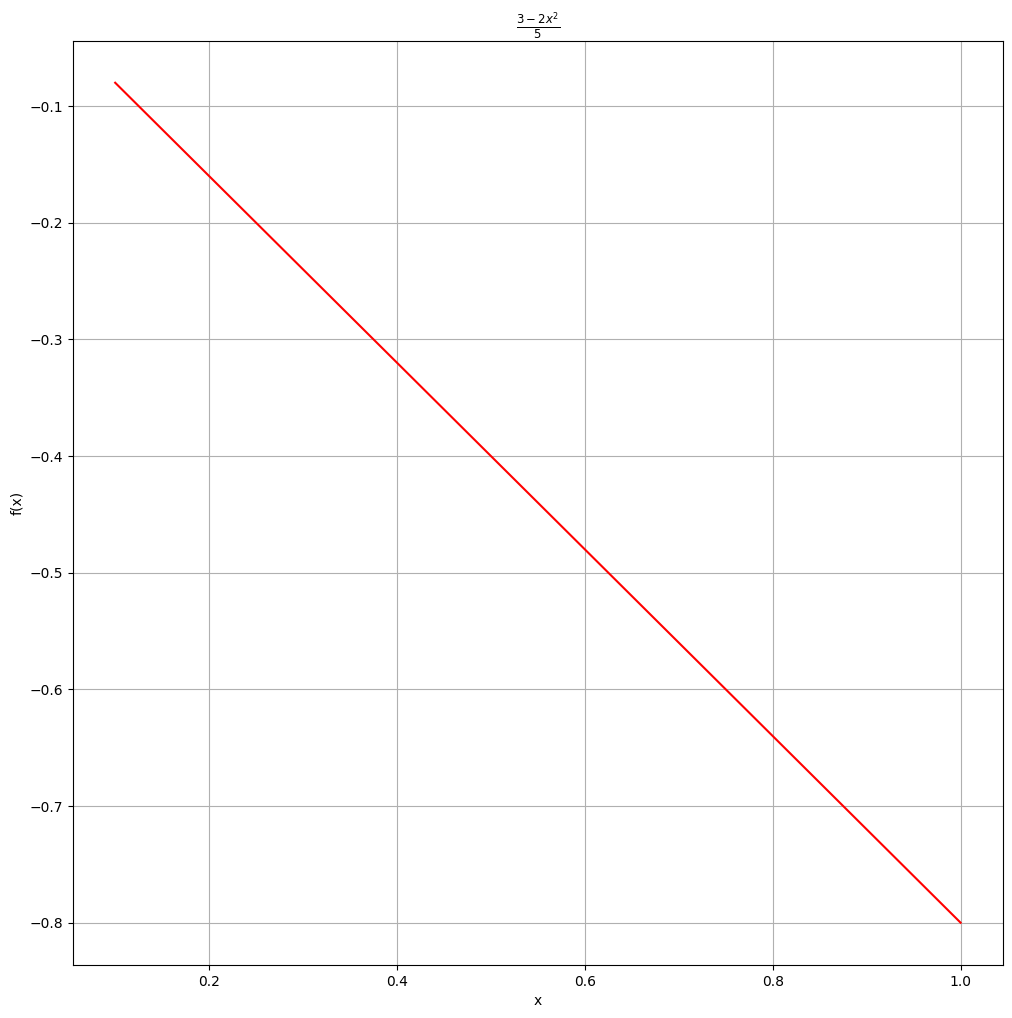

We can see that values of the phi derivate lie in the range (0, 1)
-------------------------
Choose x_0 from the area of ​localization
x_0 = 0.32240759576071837
-------------------------
Searching the root...
Calculated root: 0.5
0.0
Number of iterations: 39
-------------------------
-------------------------
-------------------------

Solve the first nonlinear system with the Newton method...


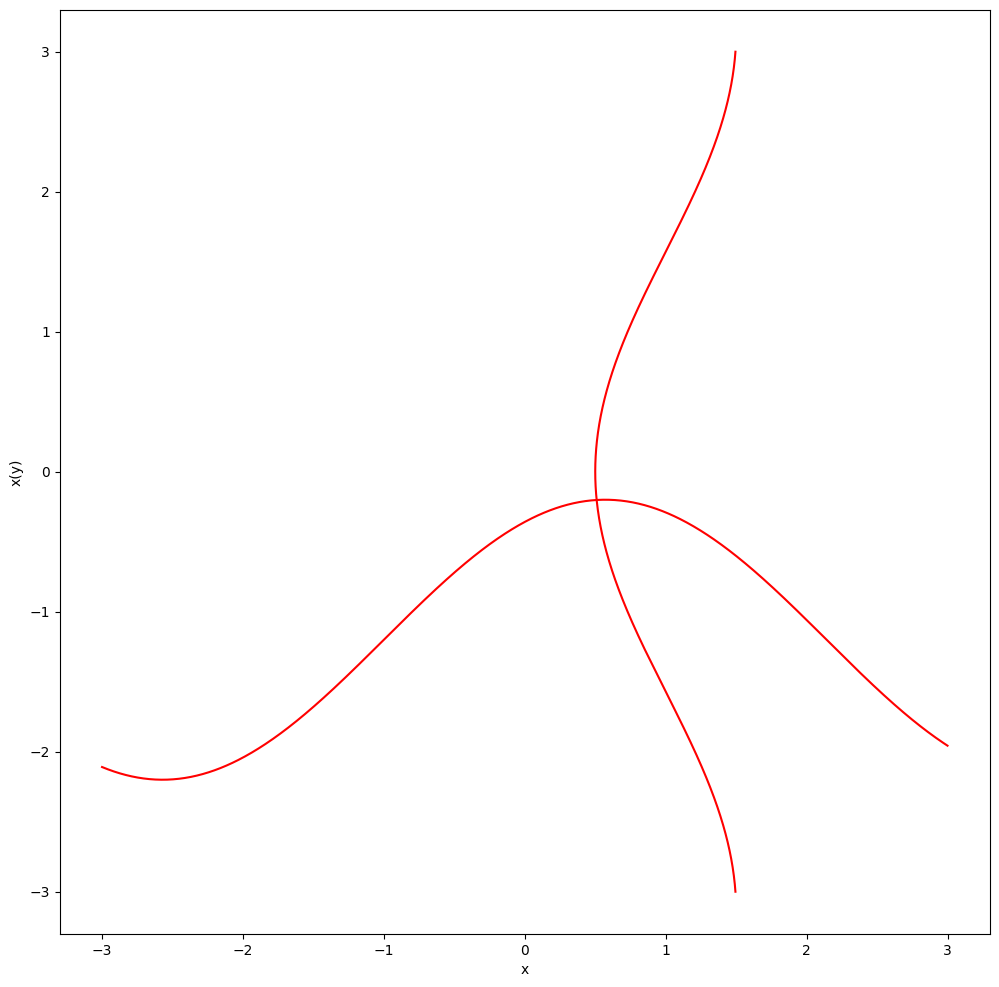

According to the plot, choose [x_0, y_0] like:
[[ 1.18824573]
 [-1.9568025 ]]
-------------------------
Functions matrix: 
Matrix([[-y + sin(x + 1) - 1.2], [2*x + cos(y) - 2]])
-------------------------
Jacobi matrix: 
Matrix([[cos(x + 1), -1], [2, -sin(y)]])
-------------------------
Invertible Jacobi matrix: 
Matrix([[2*sin(y)/(2*sin(y)*cos(x + 1) - 4), -2/(2*sin(y)*cos(x + 1) - 4)], [2/(sin(y)*cos(x + 1) - 2), -cos(x + 1)/(sin(y)*cos(x + 1) - 2)]])
-------------------------
Set the following precision for calculating:
Epsilon = 0.001
-------------------------
Calculating intersection point...
Calculated res: 
[[ 0.51015016]
 [-0.20183842]]
Number of iterations: 7
-------------------------
-------------------------
-------------------------

Solve the second nonlinear system with the Newton method...


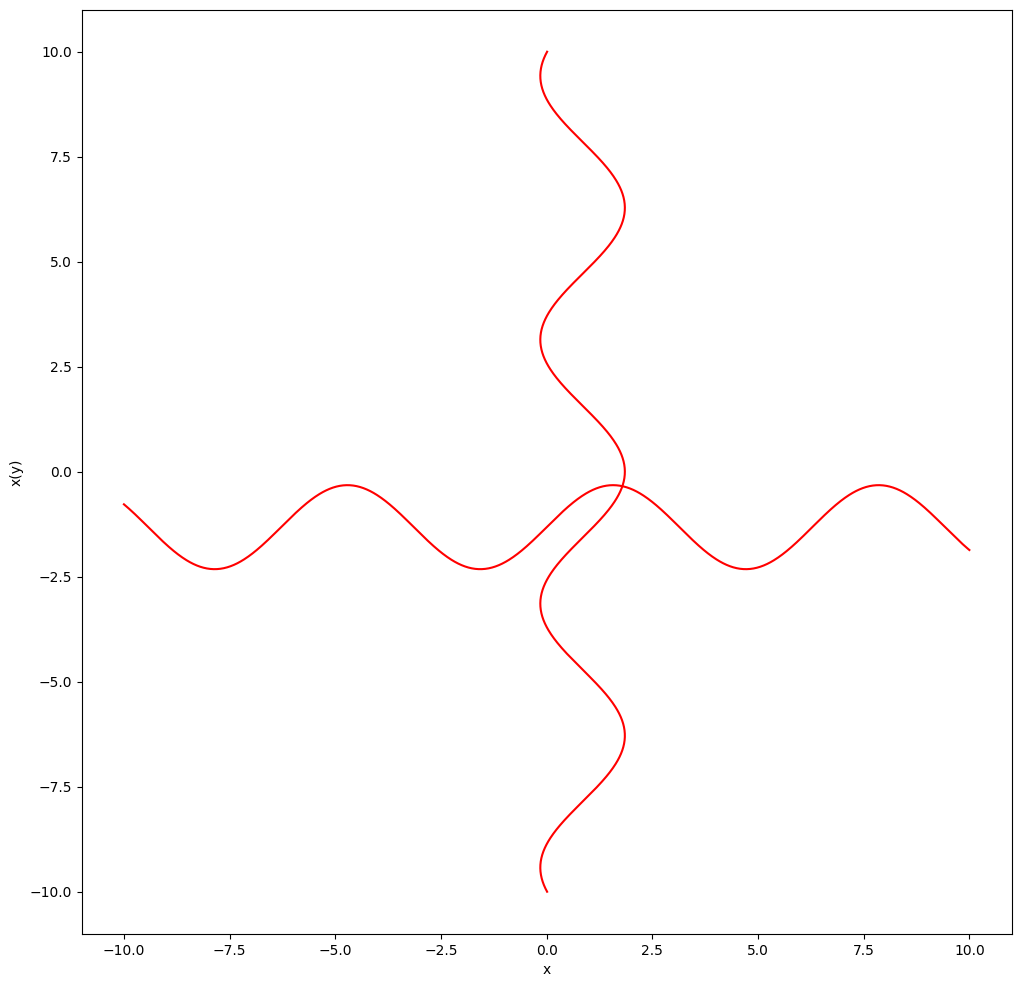

According to the plot, choose [x_0, y_0] like:
[[ 1.23196015]
 [-1.17887999]]
-------------------------
Functions matrix: 
Matrix([[-y + sin(x) - 1.32], [-x + cos(y) + 0.85]])
-------------------------
Jacobi matrix: 
Matrix([[cos(x), -1], [-1, -sin(y)]])
-------------------------
Invertible Jacobi matrix: 
Matrix([[-sin(y)/(-sin(y)*cos(x) - 1), 1/(-sin(y)*cos(x) - 1)], [-1/(sin(y)*cos(x) + 1), -cos(x)/(sin(y)*cos(x) + 1)]])
-------------------------
Set the following precision for calculating:
Epsilon = 1e-05
-------------------------
Calculating intersection point...
Calculated res: 
[[ 1.79133861]
 [-0.34422104]]
Number of iterations: 6
-------------------------
-------------------------
-------------------------



In [131]:
def main ():
    epsilon = sys.float_info.epsilon
    
    x = symbols ('x')
    symb_eq = Eq(2 * x * x + 5 * x - 3, 0)
    print("Find the roots of the following equation:")
    print("2 * x * x + 5 * x - 3" + " = 0")
    print('Symbolic calculating of roots give the following result:')
    res = solveset(symb_eq, x)
    res = list(res)
    print(res)


    eq = OneArgFunction(lambda x: 2 * np.power(x, 2) + 5 * x - 3, "$2x^2 + 5x - 3$")
    eq_graph = GraphCreator(12, 12, eq.name)
    x = np.linspace (-10, 4, num=1000)
    eq_graph.add_graph (x, eq(x), y_name = "f(x)")
    eq_graph()

    ####                The first root

    print('Choosing an area of ​localization for the first root (x = ' + str(res[0]) + ')')
    print('According to the plot, choose an area [-3.5, -2.5]')
    print ('-------------------------')

    print('Choose the following phi-function for iterations: ')
    phi_1 = OneArgFunction(lambda x: -np.sqrt((3 - 5 * x) / 2), "$\\frac{3 - 5x}{2}$")   
    phi_1_graph = GraphCreator(12, 12, phi_1.name)
    x = np.linspace (-3.5, -2.5, num=1000)
    phi_1_graph.add_graph (x, phi_1(x), y_name = "f(x)")
    phi_1_graph()
    print('We can see that values of phi-function lie in the localization area')
    print ('-------------------------')

    print('Calculating the derivate of phi-function...')
    phi_1_der = OneArgFunction(lambda x: 5 / (np.sqrt(6 - 10 * x)), "$\\frac{5}{\\sqrt{6 - 10 * x}}$") # add other desc
    phi_1_der_graph = GraphCreator(12, 12, phi_1_der.name)
    phi_1_der_graph.add_graph (x, phi_1_der(x), y_name = "f(x)")
    phi_1_der_graph()

    print('We can see that values of the phi derivate lie in the range (0, 1)')
    print('-------------------------')

    print('Choose x_0 from the area of ​localization')
    x_0 = random.uniform(-3.5, -2.5)
    print('x_0 = ' + str(x_0))
    print('-------------------------')

    print('Searching the root...')
    iters = 0
    while (np.abs(eq(x_0)) > epsilon):
        x_0 = phi_1(x_0)
        iters += 1

    print ('Calculated root: ' + str(x_0))
    print (eq(x_0))
    print ('Number of iterations: ' + str(iters))
    print('-------------------------')

    ####            The second root

    print('Choosing an area of ​localization for the second root (x = ' + str(res[1]) + ')')
    print('According to the plot, choose an area [0.1, 1]')
    print ('-------------------------')

    print('Choose the following phi-function for iterations: ')
    phi_2 = OneArgFunction(lambda x: (3 - 2 * x * x) / 5, "$\\frac{3 - 2x^{2}}{5}$")   # add other desc
    phi_2_graph = GraphCreator(12, 12, phi_2.name)
    x = np.linspace (0.1, 1, num=1000)
    phi_2_graph.add_graph (x, phi_2(x), y_name = "f(x)")
    phi_2_graph()
    print('We can see that values of phi-function lie in the localization area')
    print ('-------------------------')

    print('Calculating the derivate of phi-function...')
    phi_2_der_graph = GraphCreator(12, 12, phi_2.name)
    phi_2_der = OneArgFunction(lambda x: (-4  * x) / 5, "$\\- frac{4x}{5}$") # add other desc
    phi_2_der_graph.add_graph (x, phi_2_der(x), y_name = "f(x)")
    phi_2_graph()

    print('We can see that values of the phi derivate lie in the range (0, 1)')
    print('-------------------------')

    print('Choose x_0 from the area of ​localization')
    x_0 = random.uniform(0.1, 1)
    print('x_0 = ' + str(x_0))
    print('-------------------------')

    print('Searching the root...')
    iters = 0
    while (np.abs(eq(x_0)) > epsilon):
        x_0 = phi_2(x_0)
        iters += 1

    print ('Calculated root: ' + str(x_0))
    print (eq(x_0))
    print ('Number of iterations: ' + str(iters))
    print('-------------------------')
    print('-------------------------')
    print('-------------------------\n')

    print('Solve the first nonlinear system with the Newton method...')
    f_1 = OneArgFunction(lambda x: np.sin(x + 1) - 1.2)   # add other desc
    x = np.linspace (-3, 3, num=1000)
    system_graph = GraphCreator(12, 12, f_1.name)
    system_graph.add_graph (x, f_1(x), y_name = "y(x)")

    y = np.linspace (-3, 3, num=1000)


    f_2 = OneArgFunction(lambda y: (2 - np.cos(y)) / 2)
    system_graph.add_graph (f_2(y), y, y_name = "x(y)")
    system_graph()

    print('According to the plot, choose [x_0, y_0] like:')
    start_y = f_1(3)
    start_x = f_2(start_y)
    res = np.array([[start_x], [start_y]])
    print (res)
    print('-------------------------')

    x, y = symbols ('x y')
    f_1 = sin(x + 1) - y - 1.2
    f_2 = 2 * x + cos(y) - 2 

    F = Matrix([f_1, f_2])

    print('Functions matrix: \n' + str(F))
    print('-------------------------')

    W = F.jacobian(Matrix([x, y]))
    print('Jacobi matrix: \n' + str(W))
    print('-------------------------')

    Inv_W = W.inv()
    print('Invertible Jacobi matrix: \n' + str(Inv_W))
    print('-------------------------')
    
    W_F = (W.inv() * F)
    func = lambdify((x, y),W_F)

    print('Set the following precision for calculating:')
    epsilon = 10E-4
    print('Epsilon = ' + str(epsilon))
    print('-------------------------')

    print('Calculating intersection point...')
    iters = 0
    while (np.all(np.abs(func(res[0][0], res[1][0]))) > epsilon):
        res = res - func(res[0][0], res[1][0])
        iters += 1

    print('Calculated res: \n' + str(res))
    print('Number of iterations: ' + str(iters))
    print('-------------------------')
    print('-------------------------')
    print('-------------------------\n')

    ####            Solve the second nonlinear system

    print('Solve the second nonlinear system with the Newton method...')
    f_1 = OneArgFunction(lambda x: np.sin(x) - 1.32)   # add other desc
    x = np.linspace (-10, 10, num=1000)
    system_graph = GraphCreator(12, 12, f_1.name)
    system_graph.add_graph (x, f_1(x), y_name = "y(x)")

    y = np.linspace (-10, 10, num=1000)

    f_2 = OneArgFunction(lambda y:  np.cos(y) + 0.85)
    system_graph.add_graph (f_2(y), y, y_name = "x(y)")
    system_graph()

    print('According to the plot, choose [x_0, y_0] like:')
    start_y = f_1(3)
    start_x = f_2(start_y)
    res = np.array([[start_x], [start_y]])
    print (res)
    print('-------------------------')

    x, y = symbols ('x y')
    f_1 = sin(x) - y - 1.32
    f_2 = cos(y) - x + 0.85

    F = Matrix([f_1, f_2])

    f_1 = lambdify((x, y), f_1)
    f_2 = lambdify((x, y), f_2)

    print('Functions matrix: \n' + str(F))
    print('-------------------------')

    W = F.jacobian(Matrix([x, y]))
    print('Jacobi matrix: \n' + str(W))
    print('-------------------------')

    Inv_W = W.inv()
    print('Invertible Jacobi matrix: \n' + str(Inv_W))
    print('-------------------------')
    
    W_F = (W.inv() * F)
    func = lambdify((x, y),W_F)

    print('Set the following precision for calculating:')
    epsilon = 10E-6
    print('Epsilon = ' + str(epsilon))
    print('-------------------------')

    print('Calculating intersection point...')
    iters = 0
    while (np.all(np.abs(func(res[0][0], res[1][0]))) > epsilon):
        res = res - func(res[0][0], res[1][0])
        iters += 1

    print('Calculated res: \n' + str(res))
    print('Number of iterations: ' + str(iters))
    print('-------------------------')
    print('-------------------------')
    print('-------------------------\n')
main()

## Заключение
### Для исследуемой СЛАУ получены все интересующие нас характеристики:

---

#### Корни уравнения, полученные методом простой иттераций:
* $x_{1} = -3$ 
* $x_{2} = 0.5$ 
#### Число итераций: 40

Благодаря выставленной точности $\varepsilon$ равной машинному нулю, удалось добится нулевой невязки 
Видно, что итеративный метод даёт достаточно точный результат

---

#### Найдена с точностью $\varepsilon = 10^{-3}$ методом Ньютона точка пересечения кривых для первой системы: 

$$
\begin{bmatrix}
    1.23196015 \\
    -1.17887999
\end{bmatrix}
$$

#### Число итераций: 7
---

#### Найдена с точностью $\varepsilon = 10^{-5}$ методом Ньютона точка пересечения кривых для второй системы: 

$$
\begin{bmatrix}
    1.79133861 \\
    -0.34422104
\end{bmatrix}
$$

#### Число итераций: 6

### Из проведенной работы можно сделать вывод, что численные методы решения уравнений и нелинейных систем в облатси локализации дают результаты заданной точности